<a href="https://colab.research.google.com/github/Sergius-DS/elecciOn_datasets/blob/main/data_diabetes_Lat_Longitud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('data_diabetes_limpio_temp.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625956 entries, 0 to 625955
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FECHA_AFILIADOS_SIS   625956 non-null  object 
 1   CODIGO_ANONIMIZADO    625956 non-null  object 
 2   EDAD                  625956 non-null  int64  
 3   UBIGEO                625956 non-null  int64  
 4   DEPARTAMENTO          625956 non-null  object 
 5   PROVINCIA             625956 non-null  object 
 6   DISTRITO              625956 non-null  object 
 7   SEXO                  625956 non-null  object 
 8   FECHA_PRIMER_DX       625956 non-null  object 
 9   TIPO_DIABETES         625956 non-null  object 
 10  CON_DX_OBESIDAD       625956 non-null  int64  
 11  CON_DX_HIPERTENSION   625956 non-null  int64  
 12  CON_DX_SALUDMENTAL    625956 non-null  int64  
 13  CANT_ATENCIONES       625956 non-null  int64  
 14  VALOR_NETO            625956 non-null  float64
 15  

In [ ]:
data.head(4)

,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud
0,2023-09-30,000015CA7003D37272A17DE250F6AFE9339F487360EC50...,75,70101,CALLAO,CALLAO,CALLAO,MASCULINO,2018-01-05,Diabetes mellitus tipo 2,1,1,0,1,6.60,0,0.00,0,0,CALLAO-CALLAO-CALLAO,-12.06,-77.15
1,2023-03-31,0000249BA42728EB9AF192293384E60E78449CE1DDA27A...,62,110106,ICA,ICA,PARCONA,MASCULINO,2018-08-09,Diabetes mellitus tipo 2,0,0,0,0,0.00,0,0.00,0,0,ICA-ICA-PARCONA,-14.05,-75.69
2,2023-09-30,000031B49CE1B8437CF896A1D20A1E7A5048DE00952634...,55,40112,AREQUIPA,AREQUIPA,PAUCARPATA,FEMENINO,2018-02-09,Diabetes mellitus no especificada,0,1,1,5,53.67,0,0.00,0,0,AREQUIPA-AREQUIPA-PAUCARPATA,-16.43,-71.50
3,2023-03-31,000088EB332F5E7B13C522719F24EDC16A12FC1245B405...,56,150125,LIMA,LIMA,PUENTE PIEDRA,FEMENINO,2023-01-17,Diabetes mellitus tipo 2,1,0,0,2,0.00,0,0.00,0,0,LIMA-LIMA-PUENTE PIEDRA,-11.87,-77.08


In [ ]:
data[data['CODIGO_ANONIMIZADO'].duplicated()].count()

,0
FECHA_AFILIADOS_SIS,0
CODIGO_ANONIMIZADO,0
EDAD,0
UBIGEO,0
DEPARTAMENTO,0
PROVINCIA,0
DISTRITO,0
SEXO,0
FECHA_PRIMER_DX,0
TIPO_DIABETES,0


In [ ]:
data['EDAD'].describe()

,EDAD
count,625956.00
mean,55.89
std,16.95
min,0.00
25%,46.00
50%,57.00
75%,68.00
max,119.00


In [ ]:
data = data.dropna(subset=['latitud', 'longitud'])

In [ ]:
data = data.reset_index()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 623867 non-null  int64  
 1   FECHA_AFILIADOS_SIS   623867 non-null  object 
 2   CODIGO_ANONIMIZADO    623867 non-null  object 
 3   EDAD                  623867 non-null  int64  
 4   UBIGEO                623867 non-null  int64  
 5   DEPARTAMENTO          623867 non-null  object 
 6   PROVINCIA             623867 non-null  object 
 7   DISTRITO              623867 non-null  object 
 8   SEXO                  623867 non-null  object 
 9   FECHA_PRIMER_DX       623867 non-null  object 
 10  TIPO_DIABETES         623867 non-null  object 
 11  CON_DX_OBESIDAD       623867 non-null  int64  
 12  CON_DX_HIPERTENSION   623867 non-null  int64  
 13  CON_DX_SALUDMENTAL    623867 non-null  int64  
 14  CANT_ATENCIONES       623867 non-null  int64  
 15  

In [ ]:
data.head(24)

,index,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud
0,0,2023-09-30,000015CA7003D37272A17DE250F6AFE9339F487360EC50...,75,70101,CALLAO,CALLAO,CALLAO,MASCULINO,2018-01-05,Diabetes mellitus tipo 2,1,1,0,1,6.60,0,0.00,0,0,CALLAO-CALLAO-CALLAO,-12.06,-77.15
1,1,2023-03-31,0000249BA42728EB9AF192293384E60E78449CE1DDA27A...,62,110106,ICA,ICA,PARCONA,MASCULINO,2018-08-09,Diabetes mellitus tipo 2,0,0,0,0,0.00,0,0.00,0,0,ICA-ICA-PARCONA,-14.05,-75.69
2,2,2023-09-30,000031B49CE1B8437CF896A1D20A1E7A5048DE00952634...,55,40112,AREQUIPA,AREQUIPA,PAUCARPATA,FEMENINO,2018-02-09,Diabetes mellitus no especificada,0,1,1,5,53.67,0,0.00,0,0,AREQUIPA-AREQUIPA-PAUCARPATA,-16.43,-71.50
3,3,2023-03-31,000088EB332F5E7B13C522719F24EDC16A12FC1245B405...,56,150125,LIMA,LIMA,PUENTE PIEDRA,FEMENINO,2023-01-17,Diabetes mellitus tipo 2,1,0,0,2,0.00,0,0.00,0,0,LIMA-LIMA-PUENTE PIEDRA,-11.87,-77.08
4,4,2023-03-31,0000AD2FC5F5176DF573CE912D47FB0E1AF58917E81C64...,78,60101,CAJAMARCA,CAJAMARCA,CAJAMARCA,FEMENINO,2021-11-26,Diabetes mellitus tipo 2,0,0,0,0,0.00,0,0.00,0,0,CAJAMARCA-CAJAMARCA-CAJAMARCA,-7.15,-78.51
5,5,2023-09-30,0000AF228977E483FF7032A038D723921081DC6BEB1180...,18,70102,CALLAO,CALLAO,BELLAVISTA,FEMENINO,2023-05-29,Diabetes mellitus tipo 1,0,0,0,2,187.72,0,0.00,0,0,CALLAO-CALLAO-BELLAVISTA,-12.06,-77.13
6,6,2023-03-31,0000DF2C9636FA3650CFB9096B8D52ED7C00DEC8A8D390...,65,250301,UCAYALI,PADRE ABAD,PADRE ABAD,FEMENINO,2018-12-29,Diabetes mellitus no especificada,1,1,1,0,0.00,0,0.00,0,0,UCAYALI-PADRE ABAD-PADRE ABAD,-9.03,-75.51
7,7,2023-09-30,0000F157F4A508199E7AB5BC2C578CF314619454313BAA...,63,150112,LIMA,LIMA,INDEPENDENCIA,FEMENINO,2018-05-25,Diabetes mellitus tipo 2,1,1,0,2,220.20,0,0.00,0,0,LIMA-LIMA-INDEPENDENCIA,-12.00,-77.05
8,8,2023-03-31,000138461C3A7C68629B8C5ADAA0757E965110359CA37D...,66,150103,LIMA,LIMA,ATE,MASCULINO,2022-02-10,Diabetes mellitus no especificada,0,0,0,0,0.00,0,0.00,0,0,LIMA-LIMA-ATE,-12.03,-76.92
9,9,2023-03-31,0001B1D9CC72BC992B421521545684AB689714B14E539F...,70,150801,LIMA,HUAURA,HUACHO,FEMENINO,2018-09-11,Diabetes mellitus tipo 2,1,0,0,0,0.00,0,0.00,0,0,LIMA-HUAURA-HUACHO,-11.11,-77.61


In [ ]:
data.drop('index', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FECHA_AFILIADOS_SIS   623867 non-null  object 
 1   CODIGO_ANONIMIZADO    623867 non-null  object 
 2   EDAD                  623867 non-null  int64  
 3   UBIGEO                623867 non-null  int64  
 4   DEPARTAMENTO          623867 non-null  object 
 5   PROVINCIA             623867 non-null  object 
 6   DISTRITO              623867 non-null  object 
 7   SEXO                  623867 non-null  object 
 8   FECHA_PRIMER_DX       623867 non-null  object 
 9   TIPO_DIABETES         623867 non-null  object 
 10  CON_DX_OBESIDAD       623867 non-null  int64  
 11  CON_DX_HIPERTENSION   623867 non-null  int64  
 12  CON_DX_SALUDMENTAL    623867 non-null  int64  
 13  CANT_ATENCIONES       623867 non-null  int64  
 14  VALOR_NETO            623867 non-null  float64
 15  

In [ ]:
df_limpio = data.copy()

# 3. Normalizacion de datos

DATA FEATURING

Creamos una función *valores_unicos* para ver la frecuencia y porcentaje de los valores únicos de cada columna categórica

In [ ]:
def valores_unicos(df, c):
    # Contar las frecuencias de los valores únicos
    frecuencias = df[c].dropna().value_counts()

    # Calcular el porcentaje para cada valor único
    total = frecuencias.sum()
    porcentajes = (frecuencias / total) * 100

    # Mostrar los valores únicos, sus frecuencias y porcentajes
    resultado = pd.DataFrame({
        'Frecuencia': frecuencias,
        'Porcentaje': porcentajes,
    })
    # Formatear la columna de porcentaje
    resultado['Porcentaje'] = resultado['Porcentaje'].map(lambda x: f"{x:.2f}%")

    print(resultado)

In [ ]:
valores_unicos(df_limpio, 'SEXO')

           Frecuencia Porcentaje
SEXO                            
FEMENINO       410695     65.83%
MASCULINO      213172     34.17%


In [ ]:
valores_unicos(df_limpio, 'HOSPITALIZADO')

               Frecuencia Porcentaje
HOSPITALIZADO                       
0                  606974     97.29%
1                   16893      2.71%


In [ ]:
valores_unicos(df_limpio, 'TIPO_DIABETES')

                                             Frecuencia Porcentaje
TIPO_DIABETES                                                     
Diabetes mellitus tipo 2                         446581     71.58%
Diabetes mellitus  no especificada               135653     21.74%
Diabetes mellitus tipo 1                          32623      5.23%
Otras Diabetes mellitus especificada               7629      1.22%
Diabetes mellitus asociada con desnutrición        1381      0.22%


# 4. Análisis Exploratorio (EDA)

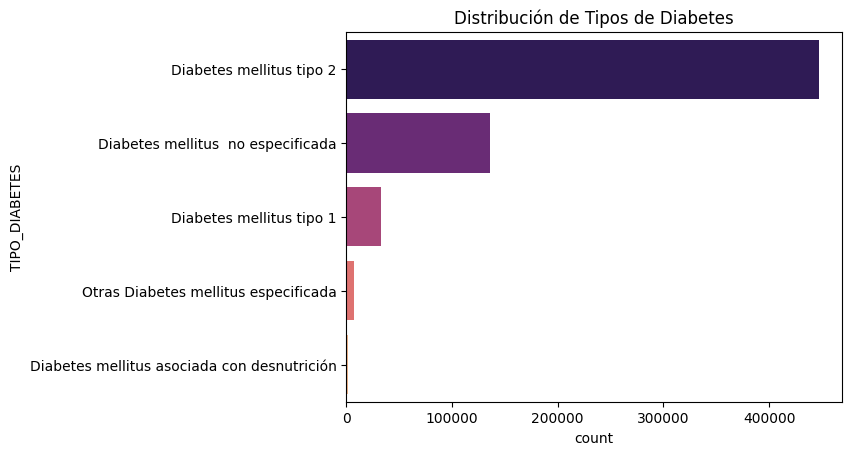

In [ ]:
sns.countplot(data=df_limpio, y='TIPO_DIABETES', palette="magma")
plt.title('Distribución de Tipos de Diabetes')
plt.show()

In [ ]:
# Convert 'FECHA_PRIMER_DX' to datetime objects
df_limpio['FECHA_PRIMER_DX'] = pd.to_datetime(df_limpio['FECHA_PRIMER_DX'])


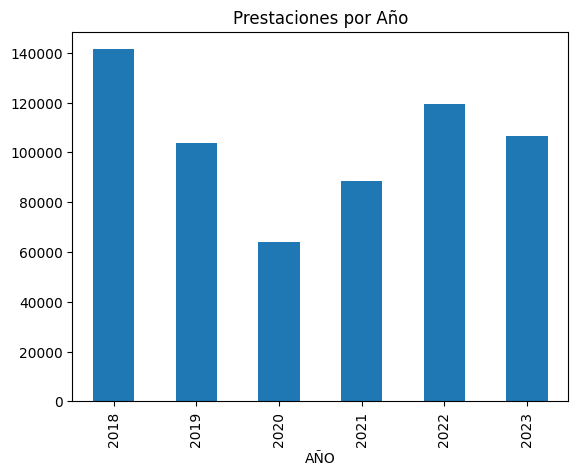

In [ ]:
df_limpio['AÑO'] = df_limpio['FECHA_PRIMER_DX'].dt.year
prestaciones_por_año = df_limpio.groupby('AÑO').size()
prestaciones_por_año.plot(kind='bar', title="Prestaciones por Año")
plt.show()

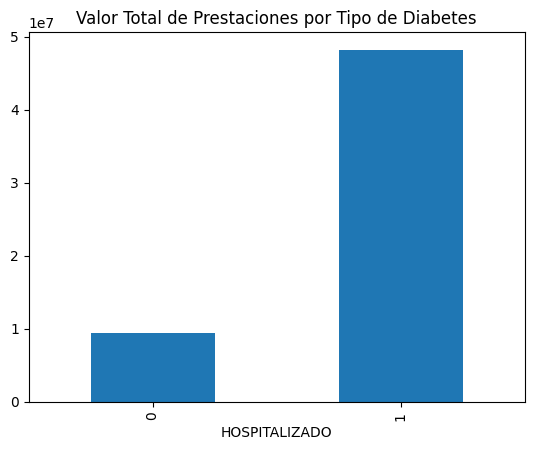

In [ ]:
prestaciones_por_tipo = df_limpio.groupby('HOSPITALIZADO')['VALOR_NETO'].sum()
prestaciones_por_tipo.plot(kind='bar', title="Valor Total de Prestaciones por Tipo de Diabetes")
plt.show()


In [ ]:
df_limpio.groupby('HOSPITALIZADO')['VALOR_NETO'].sum()

,VALOR_NETO
HOSPITALIZADO,
0,9415660.81
1,48207442.49


In [ ]:
df_limpio.HOSPITALIZADO.value_counts()

,count
HOSPITALIZADO,
0,606974
1,16893


In [ ]:
valores_unicos(df_limpio, 'VALOR_NETO')

            Frecuencia Porcentaje
VALOR_NETO                       
0.00            450291     72.18%
3.60              3401      0.55%
1.92              3136      0.50%
3.84              2956      0.47%
1.80              2366      0.38%
...                ...        ...
161486.28            1      0.00%
18582.61             1      0.00%
486.31               1      0.00%
502.62               1      0.00%
386.49               1      0.00%

[40924 rows x 2 columns]


In [ ]:
# Si la edad del paciente está disponible, reasignar
diabetes_no_esp = df_limpio[(df_limpio['TIPO_DIABETES'] == 'Diabetes mellitus  no especificada') ]
diabetes_no_esp.shape

(135653, 23)

In [ ]:
diabetes_no_esp.EDAD.mean()

54.05573780159672

In [ ]:
diabetes_no_esp.EDAD.value_counts()

,count
EDAD,
57,3209
58,3187
54,3089
64,3081
53,3061
...,...
105,3
104,2
109,1


In [ ]:
# Guarda la muestra en un nuevo archivo CSV para usar en Power BI
#df_limpio.to_csv('data_diabetes_limpio.csv', index=False)


In [ ]:
diabetes_tipo2 = df_limpio[(df_limpio['TIPO_DIABETES'] == 'Diabetes mellitus tipo 2') ]
diabetes_tipo2.EDAD.mean()

56.61663841497959

In [ ]:
diabetes_tipo1 = df_limpio[(df_limpio['TIPO_DIABETES'] == 'Diabetes mellitus tipo 1') ]
diabetes_tipo1.EDAD.mean()

54.43227171014315

In [ ]:
diabetes_no_esp[['CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL']].agg(['mean', 'sum'])

,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL
mean,0.59,0.33,0.21
sum,79717.00,45220.00,28277.00


In [ ]:
diabetes_tipo1[['CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL']].agg(['mean', 'sum'])

,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL
mean,0.51,0.41,0.23
sum,16760.00,13364.00,7652.00


In [ ]:
diabetes_tipo2[['CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL']].agg(['mean', 'sum'])

,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL
mean,0.64,0.37,0.21
sum,284145.00,167250.00,91670.00


In [ ]:
len(diabetes_tipo2)

446581

In [ ]:
probabilidades = [0.93, 0.07]  # Proporción basada en los datos (71.64% tipo 2 y 5.22% tipo 1 normalizadas)
condiciones = df_limpio['TIPO_DIABETES'] == 'Diabetes mellitus  no especificada'
df_limpio.loc[condiciones, 'TIPO_DIABETES'] = np.random.choice(
    ['Diabetes mellitus tipo 2', 'Diabetes mellitus tipo 1'],
    size=condiciones.sum(),
    p=probabilidades
)

OBSERVACIONES:

Total de casos considerados para la elección aleatoria = 446581 (tipo 2) + 32623 (tipo 1) = 479204

Probabilidad para el tipo 2: 446581 / 479204 ≈ 0,93

Probabilidad para el tipo 1: 32623 / 479204 ≈ 0,07

Dado que estas coinciden con las probabilidades de entrada ([0,93, 0,07]), su configuración en este sentido es adecuada.

In [ ]:
valores_unicos(df_limpio, 'TIPO_DIABETES')

                                             Frecuencia Porcentaje
TIPO_DIABETES                                                     
Diabetes mellitus tipo 2                         572822     91.82%
Diabetes mellitus tipo 1                          42035      6.74%
Otras Diabetes mellitus especificada               7629      1.22%
Diabetes mellitus asociada con desnutrición        1381      0.22%


In [ ]:
print(df_limpio['TIPO_DIABETES'].unique())

['Diabetes mellitus tipo 2' 'Diabetes mellitus tipo 1'
 'Otras Diabetes mellitus especificada'
 'Diabetes mellitus asociada con desnutrición']


In [ ]:
df_limpio.shape

(623867, 23)



---





---



**LIMPIEZA EN COLUMNAS CON VALORES NETO 30 Nov 2024**

VALORES MAYORES QUE CERO Y MENORES QUE 1 EN VALOR_NETO

In [ ]:
df_limpio[(df_limpio['VALOR_NETO'] > 0) & (df_limpio['VALOR_NETO'] < 1)]

,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud,AÑO
490,2023-03-31,00356C142A14956EA910AEE28EDA8DAEF94F76CD672CC9...,55,150110,LIMA,LIMA,COMAS,FEMENINO,2018-02-03,Diabetes mellitus tipo 2,1,1,0,5,0.96,0,0.00,0,0,LIMA-LIMA-COMAS,-11.96,-77.05,2018
918,2023-03-31,00611A1F2DAAE18E8C603B417EA699E00FCD409F6C9383...,63,130103,LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA,FEMENINO,2023-03-01,Diabetes mellitus tipo 2,0,0,0,1,0.44,0,0.00,0,0,LA LIBERTAD-TRUJILLO-FLORENCIA DE MORA,-8.08,-79.02,2023
1384,2023-03-31,0094475C8381252F1761F8FCD10D786F115440A7E059A5...,66,150115,LIMA,LIMA,LA VICTORIA,FEMENINO,2022-12-28,Diabetes mellitus tipo 2,1,1,1,1,0.60,0,0.00,0,0,LIMA-LIMA-LA VICTORIA,-12.06,-77.03,2022
1446,2023-03-31,009BC1086BFF733C66A4631D353299E866FFE278C9B414...,46,130809,LA LIBERTAD,PATAZ,PATAZ,MASCULINO,2018-01-06,Diabetes mellitus tipo 2,1,1,0,1,0.81,0,0.00,0,0,LA LIBERTAD-PATAZ-PATAZ,-7.79,-77.59,2018
1930,2023-03-31,00CA8CF96DEAB5E86BA148F783F422274EFC572784039E...,69,120132,JUNIN,HUANCAYO,SAÑO,FEMENINO,2018-01-09,Diabetes mellitus tipo 1,1,1,0,1,0.04,0,0.00,0,0,JUNIN-HUANCAYO-SAÑO,-11.96,-75.26,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621568,2023-03-31,FF0CB4DAAECC8638F466E1CD4F1E39ACEEEEAC4640E4CB...,85,20101,ANCASH,HUARAZ,HUARAZ,FEMENINO,2022-12-20,Diabetes mellitus tipo 2,1,1,1,2,0.90,0,0.00,0,0,ANCASH-HUARAZ-HUARAZ,-9.53,-77.53,2022
621690,2023-03-31,FF1A135F1EBE99036D2D8FDE00333F5D772C4B08104242...,62,130105,LA LIBERTAD,TRUJILLO,LA ESPERANZA,FEMENINO,2023-02-20,Diabetes mellitus tipo 2,1,0,0,1,0.81,0,0.00,0,0,LA LIBERTAD-TRUJILLO-LA ESPERANZA,-8.06,-79.05,2023
622890,2023-06-30,FF96ACDDB0A6B4B170C38D0162F92B88AF33CCB5397230...,45,21801,ANCASH,SANTA,CHIMBOTE,MASCULINO,2023-05-04,Diabetes mellitus tipo 2,1,0,0,1,0.90,0,0.00,0,0,ANCASH-SANTA-CHIMBOTE,-9.04,-78.61,2023
622892,2023-06-30,FF96D9F3D4764D9792616978270AAB5970D3D8B7478F98...,44,160104,LORETO,MAYNAS,INDIANA,FEMENINO,2023-05-05,Diabetes mellitus tipo 2,0,1,0,1,0.72,0,0.00,0,0,LORETO-MAYNAS-INDIANA,-3.50,-73.04,2023


In [ ]:
df_limpio[df_limpio['VALOR_NETO'] == 0].count()

,0
FECHA_AFILIADOS_SIS,450291
CODIGO_ANONIMIZADO,450291
EDAD,450291
UBIGEO,450291
DEPARTAMENTO,450291
PROVINCIA,450291
DISTRITO,450291
SEXO,450291
FECHA_PRIMER_DX,450291
TIPO_DIABETES,450291


In [ ]:
df_limpio[(df_limpio['VALOR_NETO'] > 0) & (df_limpio['VALOR_NETO'] < 1)].count()

,0
FECHA_AFILIADOS_SIS,1616
CODIGO_ANONIMIZADO,1616
EDAD,1616
UBIGEO,1616
DEPARTAMENTO,1616
PROVINCIA,1616
DISTRITO,1616
SEXO,1616
FECHA_PRIMER_DX,1616
TIPO_DIABETES,1616


VALORES MAYORES QUE CERO Y MENORES QUE 1 EN VALOR_NETO_HOSP

In [ ]:
df_limpio[(df_limpio['VALOR_NETO_HOSP'] > 0) & (df_limpio['VALOR_NETO_HOSP'] < 1)].count()

,0
FECHA_AFILIADOS_SIS,5
CODIGO_ANONIMIZADO,5
EDAD,5
UBIGEO,5
DEPARTAMENTO,5
PROVINCIA,5
DISTRITO,5
SEXO,5
FECHA_PRIMER_DX,5
TIPO_DIABETES,5


In [ ]:
df_limpio['VALOR_NETO'] = np.where(df_limpio['VALOR_NETO'] < 1, 0, df_limpio['VALOR_NETO'])

In [ ]:
df_limpio[(df_limpio['VALOR_NETO'] > 0) & (df_limpio['VALOR_NETO'] < 1)].count()

,0
FECHA_AFILIADOS_SIS,0
CODIGO_ANONIMIZADO,0
EDAD,0
UBIGEO,0
DEPARTAMENTO,0
PROVINCIA,0
DISTRITO,0
SEXO,0
FECHA_PRIMER_DX,0
TIPO_DIABETES,0


In [ ]:
df_limpio[df_limpio['VALOR_NETO'] == 0].count()

,0
FECHA_AFILIADOS_SIS,451907
CODIGO_ANONIMIZADO,451907
EDAD,451907
UBIGEO,451907
DEPARTAMENTO,451907
PROVINCIA,451907
DISTRITO,451907
SEXO,451907
FECHA_PRIMER_DX,451907
TIPO_DIABETES,451907


In [ ]:
print(f"VALOR_NETO: VALORES CERO: {450291}, VALOR_NETO VALORES MAYOR QUE CERO, MENOR QUE 1: {1616}\nLuego de MAPEAR VALORES\nTOTAL: {450291 + 1616}")

VALOR_NETO: VALORES CERO: 450291, VALOR_NETO VALORES MAYOR QUE CERO, MENOR QUE 1: 1616
Luego de MAPEAR VALORES
TOTAL: 451907


In [ ]:
df_limpio['VALOR_NETO_HOSP'] = np.where(df_limpio['VALOR_NETO_HOSP'] < 1, 0, df_limpio['VALOR_NETO_HOSP'])

In [ ]:
df_limpio[(df_limpio['VALOR_NETO_HOSP'] > 0) & (df_limpio['VALOR_NETO_HOSP'] < 1)]['VALOR_NETO_HOSP'].count()

0

In [ ]:
df_limpio.shape

(623867, 23)

In [ ]:
#df_limpio.to_csv('data_diabetes_limpio.csv', index=False)